In [5]:
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold as skmf
import re
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
xl =pd.ExcelFile("Fixed 2026VC.xlsx") # feed case presentation textual excel file to reader 
#data
data1=xl.parse("Sheet1",header=0) # could skip this step for case presentation data frame, this line specifies the specific sheet of the excel document and removing unwanted header where the data resides in the xlsx doc


In [6]:
data1

,PID,Filename,Case,Responses
0,96,96.m4a,Post Strep,This is student doctor presenting my patient. ...
1,93,93.m4a,Rhabdomyolysis,64-year-old female presents to the emergency d...
2,90,90.m4a,Urothelial cancer,Hi there. My name is student doctor and today ...
3,76,76.m4a,Urothelial cancer,"Hello, I am presenting today on patient Alex S..."
4,63,63.m4a,Rhabdomyolysis,"Hello Dr. Rawlins, I just came from room 8 whe..."
5,30,30.mp4,Urothelial cancer,Hello. This is a case presentation of Alex Sab...
6,15,15.m4a,Rhabdomyolysis,"Hi Dr. Rollins, I'd like to present to you Mrs..."
7,11,11.m4a,Rhabdomyolysis,Good afternoon. Our patient today is Alex Savi...
8,5,5.m4a,Rhabdomyolysis,This is student Dr. reporting on Alex Sabin. M...
9,99,99.m4a,Post Strep,"Okay, so I met with a Mr. Alex, 66-year-old ma..."


In [7]:
def remove_punctuations(text): #function to remove punctuation and replace with blank space
    for punctuation in string.punctuation:
        text = text.replace('-',' ')
        text = text.replace(punctuation, '')
        text = text.lstrip()
    return text


In [8]:
from spellchecker import SpellChecker
spell =SpellChecker()
spell.word_frequency.load_text('Medical Dict.txt')


In [9]:
def spellcheck(responses):
    unknown =[]
    for i in responses:
        i=i.lower()
        j=remove_punctuations(i)
        text = j.split(' ')
        for word in text:
            if (len(word) <= 2) :
                pass 
            elif (spell.candidates(word) == None):
                unknown.append(word)
                pass
            else:
                print('Potential Spelling Error:')
                print(word)
                print('Replacements')
                print(spell.candidates(word))
    return(unknown)             


In [10]:
data1.iloc[[0,1],3]

0    This is student doctor presenting my patient. ...
1    64-year-old female presents to the emergency d...
Name: Responses, dtype: object

In [11]:
unkn=spellcheck(data1.iloc[:,3])

Potential Spelling Error:
this
Replacements
{'this'}
Potential Spelling Error:
student
Replacements
{'student'}
Potential Spelling Error:
doctor
Replacements
{'doctor'}
Potential Spelling Error:
presenting
Replacements
{'presenting'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
mrs
Replacements
{'mors', 'mus', 'yrs', 'ars', 'ers', 'mars', 'mos', 'mras', 'mes', 'irs', 'mas', 'mri', 'mers', 'mis'}
Potential Spelling Error:
sabin
Replacements
{'cabin', 'satin', 'sarin', 'sabine', 'sabian', 'sayin'}
Potential Spelling Error:
year
Replacements
{'year'}
Potential Spelling Error:
old
Replacements
{'old'}
Potential Spelling Error:
white
Replacements
{'white'}
Potential Spelling Error:
female
Replacements
{'female'}
Potential Spelling Error:
who
Replacements
{'who'}
Potential Spelling Error:
presents
Replacements
{'presents'}
Potential Spelling Error:
today
Replacements
{'today'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:

Potential Spelling Error:
mouth
Replacements
{'mouth'}
Potential Spelling Error:
every
Replacements
{'every'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
hospitalized
Replacements
{'hospitalized'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
motor
Replacements
{'motor'}
Potential Spelling Error:
vehicle
Replacements
{'vehicle'}
Potential Spelling Error:
accident
Replacements
{'accident'}
Potential Spelling Error:
colonoscopy
Replacements
{'colonoscopy'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
stent
Replacements
{'stent'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
known
Replacements
{'known'}
Potential Spelling Error:
drug
Replacements
{'drug'}
Potentia

Potential Spelling Error:
pharyngeal
Replacements
{'laryngeal'}
Potential Spelling Error:
erythema
Replacements
{'erythema'}
Potential Spelling Error:
palpation
Replacements
{'valuation', 'palpitation', 'salvation', 'palpatine'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
neck
Replacements
{'neck'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
negative
Replacements
{'negative'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
cervical
Replacements
{'cervical'}
Potential Spelling Error:
goiter
Replacements
{'goiter'}
Potential Spelling Error:
tenderness
Replacements
{'tenderness'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
cardiac
Replacements
{'cardiac'}
Potential Spelling Error:
examination
Replacements
{'examination'}
Potential Spelling Error:
reveals
Replacements
{'reveals'}
Potential Spelling Error:
normal
Replacements
{'normal'}
Potential Spelling Error:
ra

Potential Spelling Error:
cough
Replacements
{'cough'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
diagnosed
Replacements
{'diagnosed'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
post
Replacements
{'post'}
Potential Spelling Error:
strep
Replacements
{'strep'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
admitted
Replacements
{'admitted'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
telemetry
Replacements
{'telemetry'}
Potential Spelling Error:
serious
Replacements
{'serious'}
Potential Spelling Error:
condition
Replacements
{'condition'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
consulted
Replacements
{'consulted'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
hospitalist
Replaceme

Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
which
Replacements
{'which'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
takes
Replacements
{'takes'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
states
Replacements
{'states'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
been
Replacements
{'been'}
Potential Spelling Error:
out
Replacements
{'out'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
couple
Replacements
{'couple'}
Potential Spelling Error:
weeks
Replacements
{'weeks'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
need
Replacements
{'need'}
Potential Spelling Error:
refill
Replacements
{'refill'}
Potential Spelling Error:
she
Replacements
{'she

Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
bleeding
Replacements
{'bleeding'}
Potential Spelling Error:
started
Replacements
{'started'}
Potential Spelling Error:
yesterday
Replacements
{'yesterday'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
states
Replacements
{'states'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
done
Replacements
{'done'}
Potential Spelling Error:
about
Replacements
{'about'}
Potential Spelling Error:
one
Replacements
{'one'}
Potential Spelling Error:
week
Replacements
{'week'}
Potential Spelling Error:
ago
Replacements
{'ago'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
diagnosis
Replacements
{'diagnosis'}
Potential Spelli

Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
mouth
Replacements
{'mouth'}
Potential Spelling Error:
once
Replacements
{'once'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
160
Replacements
{'160'}
Potential Spelling Error:
mcg
Replacements
{'meg', 'mug', 'mig', 'mag'}
Potential Spelling Error:
per
Replacements
{'per'}
Potential Spelling Error:
actuation
Replacements
{'actuation'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
allergies
Replacements
{'allergies'}
Potential Spelling Error:
include
Replacements
{'include'}
Potential Spelling Error:
sulfa
Replacements
{'sulfa'}
Potential Spelling Error:
drugs
Replacements
{'drugs'}
Potential Spelling Error:
upon
Replacements
{'upon'}
Potential Spelling Error:
physical
Replacements
{'physical'}
Potential Spelling Error:
exam
Replaceme

{'progeria'}
Potential Spelling Error:
forgot
Replacements
{'forgot'}
Potential Spelling Error:
also
Replacements
{'also'}
Potential Spelling Error:
say
Replacements
{'say'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
liver
Replacements
{'liver'}
Potential Spelling Error:
extremity
Replacements
{'extremity'}
Potential Spelling Error:
edema
Replacements
{'edema'}
Potential Spelling Error:
tenderness
Replacements
{'tenderness'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
dorsalis
Replacements
{'borealis', 'dorsal'}
Potential Spelling Error:
pedis
Replacements
{'pedis'}
Potential Spelling Error:
pulse
Replacements
{'pulse'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
intact
Replacements
{'intact'}
Potential Spelling Error:
well
Replacements
{'well'}
Potential Spelling Error:
her
Replacemen

Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
once
Replacements
{'once'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
twice
Replacements
{'twice'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
160
Replacements
{'160'}
Potential Spelling Error:
micrograms
Replacements
{'micrograms'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
compliant
Replacements
{'compliant'}
Potential Spelling Error:
all
Replacements
{'all'}
Potential Spelling Error:
those
Replacements
{'those'}
Potential Spelling Error:
medications
Replacements
{'medications'}
Potential Spelling Error:
allergic
Replacements
{'allergic'}
Potential Spelling Error:
sulfa
Replacements
{'sulfa'}
Potential Spelling Error:
drugs
Replacements
{'drugs'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
has
Repla

Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
murmur
Replacements
{'murmur'}
Potential Spelling Error:
gallop
Replacements
{'gallop'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
heart
Replacements
{'heart'}
Potential Spelling Error:
rate
Replacements
{'rate'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
regular
Replacements
{'regular'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
lungs
Replacements
{'lungs'}
Potential Spelling Error:
are
Replacements
{'are'}
Potential Spelling Error:
clear
Replacements
{'clear'}
Potential Spelling Error:
osculation
Replacements
{'oscillation', 'occupation', 'escalation', 'ovulation'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
respiratory
Replacements
{'respiratory'}
Potential Spelling Error:
distress
Replacements
{'distress'}
Potential Spell

Potential Spelling Error:
not
Replacements
{'not'}
Potential Spelling Error:
administering
Replacements
{'administering'}
Potential Spelling Error:
any
Replacements
{'any'}
Potential Spelling Error:
sulfa
Replacements
{'sulfa'}
Potential Spelling Error:
drugs
Replacements
{'drugs'}
Potential Spelling Error:
due
Replacements
{'due'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
allergy
Replacements
{'allergy'}
Potential Spelling Error:
but
Replacements
{'but'}
Potential Spelling Error:
would
Replacements
{'would'}
Potential Spelling Error:
like
Replacements
{'like'}
Potential Spelling Error:
discontinue
Replacements
{'discontinue'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
due
Replacements
{'due'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
bleeding
Replacements
{'bleeding'}
Potential Spelling Error:
risk
Replacements
{'risk'}
Potential Spelling Error:
referring
Replacements
{'referring'}


Potential Spelling Error:
palpation
Replacements
{'valuation', 'palpitation', 'salvation', 'palpatine'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
abdomen
Replacements
{'abdomen'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
negative
Replacements
{'negative'}
Potential Spelling Error:
lloyds
Replacements
{'lloyd', "lloyd's"}
Potential Spelling Error:
test
Replacements
{'test'}
Potential Spelling Error:
ruling
Replacements
{'ruling'}
Potential Spelling Error:
out
Replacements
{'out'}
Potential Spelling Error:
infection
Replacements
{'infection'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
kidney
Replacements
{'kidney'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
full
Replacements
{'full'}
Potential Spelling Error:
range
Replacements
{'range'}
Potential Spelling Error:
motion
Replacements
{'motion'}
Potentia

{'dla', 'doe', 'dri', 'dat', 'dae', 'dub', 'dom', 'dre', 'dix', 'dob', 'dak', 'doa', 'day', 'des', 'dry', 'dax', 'dex', 'dad', 'dal', 'del', 'div', 'def', 'dee', 'doc', 'dy', 'duo', 'dut', 'duh', 'deb', 'do', 'dep', 'did', 'dow', 'dim', 'dig', 'dog', 'dod', 'dia', 'dif', 'dar', 'dui', 'da', 'der', 'dab', 'dev', 'dok', 'dil', 'dud', 'dor', 'de', 'deo', 'dou', 'dhe', 'das', 'dag', 'doo', 'dip', 'dos', 'dem', 'deh', 'dwi', 'dec', 'dan', 'dau', 'dna', 'dew', 'dun', 'det', 'dci', 'dug', 'doh', 'dop', 'dah', 'dio', 'doy', 'dam', 'dot', 'dap', 'dye', 'dol', 'ded', 'doi', 'din', 'dis', 'den', 'dei', 'dic', 'die', 'dea', 'daa', 'don', 'dir', 'di', 'dit', 'dey', 'dai', 'du', 'due'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
bicarbonate
Replacements
{'bicarbonate'}
Potential Spelling Error:
normalize
Replacements
{'normalize'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
acidosis
Replacements
{'acidosis'}
Potential Spelling Error:


Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
symbicort
Replacements
{'symbiont'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
says
Replacements
{'says'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
compliant
Replacements
{'compliant'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
all
Replacements
{'all'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
medications
Replacements
{'medications'}
Potential Spelling Error:
prior
Replacements
{'prior'}
Potential Spelling Error:
surgical
Replacements
{'surgical'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
notes
Replacements
{'notes'}
Potential Spelling Error:
appendectomy
Replacements
{'appendectomy'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
colonoscop

Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
which
Replacements
{'which'}
Potential Spelling Error:
shes
Replacements
{'shes'}
Potential Spelling Error:
taking
Replacements
{'taking'}
Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
which
Replacements
{'which'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
taking
Replacements
{'taking'}
Potential Spelling Error:
100
Replacements
{'100'}
Potential Spelling Error:
micrograms
Replacements
{'micrograms'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
family
Replacements
{'family'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
significant
Replacements
{'significant'}
Po

Potential Spelling Error:
given
Replacements
{'given'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patients
Replacements
{'patients'}
Potential Spelling Error:
presenting
Replacements
{'presenting'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
went
Replacements
{'went'}
Potential Spelling Error:
ahead
Replacements
{'ahead'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
ordered
Replacements
{'ordered'}
Potential Spelling Error:
ekg
Replacements
{'ekg'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
fear
Replacements
{'fear'}
Potential Spelling Error:
affecting
Replacements
{'affecting'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
heart
Replacements
{'heart'}
Potential Spelling Error:
got
Replacements
{'got'}
Potential Spelling Error:
venous
Replacements
{'venous'}
Potential Spelling Error:
blood
Replacements
{'blood'}
Po

Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
past
Replacements
{'past'}
Potential Spelling Error:
surgical
Replacements
{'surgical'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
colonoscopy
Replacements
{'colonoscopy'}
Potential Spelling Error:
four
Replacements
{'four'}
Potential Spelling Error:
years
Replacements
{'years'}
Potential Spelling Error:
ago
Replacements
{'ago'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
family
Replacements
{'family'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
mother
Replacements
{'mother'}
Potential Sp

Potential Spelling Error:
exudate
Replacements
{'caudate', 'erudite', 'educate', 'expiate', 'equate', 'exude', 'emulate', 'extubate'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
uvula
Replacements
{'uvula'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
midline
Replacements
{'midline'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
neck
Replacements
{'neck'}
Potential Spelling Error:
physical
Replacements
{'physical'}
Potential Spelling Error:
exam
Replacements
{'exam'}
Potential Spelling Error:
there
Replacements
{'there'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
nuchal
Replacements
{'nuchal'}
Potential Spelling Error:
rigidity
Replacements
{'rigidity'}
Potential Spelling Error:
anterior
Replacements
{'anterior'}
Potential Spelling Error:
cervical
Replacements
{'cervical'}
Potential Spelling Error:
when
Repl

{"kin's", 'kings', 'kindle', 'finale', 'inane', 'kinks', 'kinds', 'rinse', 'incase', 'kine', 'minas', 'knave', 'kisae'}
Potential Spelling Error:
phosphorous
Replacements
{'phosphorous'}
Potential Spelling Error:
uric
Replacements
{'uric'}
Potential Spelling Error:
acid
Replacements
{'acid'}
Potential Spelling Error:
urinalysis
Replacements
{'urinalysis'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
reflex
Replacements
{'reflex'}
Potential Spelling Error:
microscopic
Replacements
{'microscopic'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
reflex
Replacements
{'reflex'}
Potential Spelling Error:
culture
Replacements
{'culture'}
Potential Spelling Error:
well
Replacements
{'well'}
Potential Spelling Error:
vbg
Replacements
{'vig', 'vag', 'veg'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
then
Replacements
{'then'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:

Potential Spelling Error:
thank
Replacements
{'thank'}
Potential Spelling Error:
you
Replacements
{'you'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
your
Replacements
{'your'}
Potential Spelling Error:
time
Replacements
{'time'}
Potential Spelling Error:
this
Replacements
{'this'}
Potential Spelling Error:
student
Replacements
{'student'}
Potential Spelling Error:
reporting
Replacements
{'reporting'}
Potential Spelling Error:
alex
Replacements
{'alex'}
Potential Spelling Error:
sabin
Replacements
{'cabin', 'satin', 'sarin', 'sabine', 'sabian', 'sayin'}
Potential Spelling Error:
mrs
Replacements
{'mors', 'mus', 'yrs', 'ars', 'ers', 'mars', 'mos', 'mras', 'mes', 'irs', 'mas', 'mri', 'mers', 'mis'}
Potential Spelling Error:
sabin
Replacements
{'cabin', 'satin', 'sarin', 'sabine', 'sabian', 'sayin'}
Potential Spelling Error:
year
Replacements
{'year'}
Potential Spelling Error:
old
Replacements
{'old'}
Potential Spelling Error:
female
Replacements
{'female'

Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
which
Replacements
{'which'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
taking
Replacements
{'taking'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
when
Replacements
{'when'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
taking
Replacements
{'taking'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
date
Replacements
{'date'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
immunizations
Replacements
{'immunization'}
Potential Spelling Error:
except
Replacements
{'except'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
not
Replacements
{'not'}
Potential Spelling Error:
had
Replace

Potential Spelling Error:
pitting
Replacements
{'pitting'}
Potential Spelling Error:
edema
Replacements
{'edema'}
Potential Spelling Error:
recent
Replacements
{'recent'}
Potential Spelling Error:
weight
Replacements
{'weight'}
Potential Spelling Error:
gain
Replacements
{'gain'}
Potential Spelling Error:
approximately
Replacements
{'approximately'}
Potential Spelling Error:
pounds
Replacements
{'pounds'}
Potential Spelling Error:
non
Replacements
{'non'}
Potential Spelling Error:
smoking
Replacements
{'smoking'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
maintains
Replacements
{'maintains'}
Potential Spelling Error:
healthy
Replacements
{'healthy'}
Potential Spelling Error:
lifestyle
Replacements
{'lifestyle'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
moderate
Replacements
{'moderate'}
Potential Spelling Error:
alcohol
Replacements
{'alcohol'}
Potential Spe

{'laryngeal'}
Potential Spelling Error:
culture
Replacements
{'culture'}
Potential Spelling Error:
corroborate
Replacements
{'corroborate'}
Potential Spelling Error:
group
Replacements
{'group'}
Potential Spelling Error:
strep
Replacements
{'strep'}
Potential Spelling Error:
infection
Replacements
{'infection'}
Potential Spelling Error:
red
Replacements
{'red'}
Potential Spelling Error:
blood
Replacements
{'blood'}
Potential Spelling Error:
cells
Replacements
{'cells'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
urinalysis
Replacements
{'urinalysis'}
Potential Spelling Error:
further
Replacements
{'further'}
Potential Spelling Error:
contribute
Replacements
{'contribute'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
diagnostic
Replacements
{'diagnostic'}
Potential Spelling Error:
suspicion
Replacements
{'suspicion'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient

Potential Spelling Error:
well
Replacements
{'well'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
which
Replacements
{'which'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
takes
Replacements
{'takes'}
Potential Spelling Error:
shes
Replacements
{'shes'}
Potential Spelling Error:
presenting
Replacements
{'presenting'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
emergency
Replacements
{'emergency'}
Potential Spelling Error:
department
Replacements
{'department'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
evaluation
Replacements
{'evaluation'}
Potential Spelling Error:
one
Replacements
{'one'}
Potential Spelling Error:
episode
Replacements
{'episode'}
Potential Spelling Error:
what
Replacements
{'what'}
Potential Spelling Error:
shes
Replacements
{'shes'}
Potential Spelling Error:
calling
Replacements
{'calling'}
Potential Spelling Error:
bloody
Replacements
{

Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
mother
Replacements
{'mother'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
hypertension
Replacements
{'hypertension'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
died
Replacements
{'died'}
Potential Spelling Error:
what
Replacements
{'what'}
Potential Spelling Error:
they
Replacements
{'they'}
Potential Spelling Error:
said
Replacements
{'said'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
suspected
Replacements
{'suspected'}
Potential Spelling Error:
stroke
Replacements
{'stroke'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
social
Replacements
{'social'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelli

Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
then
Replacements
{'then'}
Potential Spelling Error:
also
Replacements
{'also'}
Potential Spelling Error:
ordered
Replacements
{'ordered'}
Potential Spelling Error:
venus
Replacements
{'venus'}
Potential Spelling Error:
blood
Replacements
{'blood'}
Potential Spelling Error:
gas
Replacements
{'gas'}
Potential Spelling Error:
order
Replacements
{'order'}
Potential Spelling Error:
assess
Replacements
{'assess'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
blood
Replacements
{'blood'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
see
Replacements
{'see'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
low
Replacements
{'low'}
Potential Spelling Error:
bicarb
Replacements
{'bicarb'}
Potential Spelling Error:
high
Replacements
{'high'}
Potential Spelling Error:
bicarb
Replace

Potential Spelling Error:
d50
Replacements
{'dla', 'doe', 'dri', 'dat', 'dae', 'dub', 'dom', 'dre', 'dix', 'dob', 'dak', 'doa', 'day', 'des', 'dry', 'dax', 'dex', 'dad', 'dal', 'del', 'div', 'def', 'dee', 'doc', 'dy', 'duo', 'dut', 'duh', 'deb', 'do', 'dep', 'did', 'dow', 'dim', 'dig', 'dog', 'dod', 'dia', 'dif', 'dar', 'dui', 'da', 'der', 'dab', 'dev', 'dok', 'dil', 'dud', 'dor', 'de', 'deo', 'dou', 'dhe', 'das', 'dag', 'doo', 'dip', 'dos', 'dem', 'deh', 'dwi', 'dec', 'dan', 'dau', 'dna', 'dew', 'dun', 'det', 'dci', 'dug', 'doh', 'dop', 'dah', 'dio', 'doy', 'dam', 'dot', 'dap', 'dye', 'dol', 'ded', 'doi', 'din', 'dis', 'den', 'dei', 'dic', 'die', 'dea', 'daa', 'don', 'dir', 'di', 'dit', 'dey', 'dai', 'du', 'due'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
insulin
Replacements
{'insulin'}
Potential Spelling Error:
get
Replacements
{'get'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
down
Replacements
{'down'}
Potential

Potential Spelling Error:
pharynx
Replacements
{'phalanx', 'larynx'}
Potential Spelling Error:
without
Replacements
{'without'}
Potential Spelling Error:
exudates
Replacements
{'exudes', 'educates', 'equates'}
Potential Spelling Error:
lesions
Replacements
{'lesions'}
Potential Spelling Error:
nuchal
Replacements
{'nuchal'}
Potential Spelling Error:
rigidity
Replacements
{'rigidity'}
Potential Spelling Error:
alarming
Replacements
{'alarming'}
Potential Spelling Error:
heart
Replacements
{'heart'}
Potential Spelling Error:
tones
Replacements
{'tones'}
Potential Spelling Error:
breathing
Replacements
{'breathing'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
non
Replacements
{'non'}
Potential Spelling Error:
labor
Replacements
{'labor'}
Potential Spelling Error:
lungs
Replacements
{'lungs'}
Potential Spelling Error:
were
Replacements
{'were'}
Potential Spelling Error:
clear
Replacements
{'clear'}
Potential Spelling Error:
the
Replacements
{'the'}
Potentia

Potential Spelling Error:
while
Replacements
{'while'}
Potential Spelling Error:
treating
Replacements
{'treating'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
nausea
Replacements
{'nausea'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
pain
Replacements
{'pain'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
high
Replacements
{'high'}
Potential Spelling Error:
calcium
Replacements
{'calcium'}
Potential Spelling Error:
levels
Replacements
{'levels'}
Potential Spelling Error:
would
Replacements
{'would'}
Potential Spelling Error:
like
Replacements
{'like'}
Potential Spelling Error:
follow
Replacements
{'follow'}
Potential Spelling Error:
bmp
Replacements
{'amp', 'bup', 'bap', 'ump', 'emp', 'bop', 'imp', 'bump', 'bip'}
Potential Spelling Error

Potential Spelling Error:
carcinoma
Replacements
{'carcinoma'}
Potential Spelling Error:
date
Replacements
{'date'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
vaccinations
Replacements
{'vaccinations'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
father
Replacements
{'father'}
Potential Spelling Error:
had
Replacements
{'had'}
Potential Spelling Error:
hypertension
Replacements
{'hypertension'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
died
Replacements
{'died'}
Potential Spelling Error:
age
Replacements
{'age'}
Potential Spelling Error:
his
Replacements
{'his'}
Potential Spelling Error:
mother
Replacements
{'mother'}
Potential Spelling Error:
living
Replacements
{'living'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
healthy
Replacements
{'healthy'}
Potential Spelling Error:
age
Replacements
{'age'}
Potential Spelling Error:
eats
Replacements
{'eats'}
Po

Potential Spelling Error:
muscularis
Replacements
{'muscular'}
Potential Spelling Error:
propria
Replacements
{'progeria'}
Potential Spelling Error:
discharging
Replacements
{'discharging'}
Potential Spelling Error:
this
Replacements
{'this'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
follow
Replacements
{'follow'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
ambulatory
Replacements
{'ambulatory'}
Potential Spelling Error:
care
Replacements
{'care'}
Potential Spelling Error:
referring
Replacements
{'referring'}
Potential Spelling Error:
him
Replacements
{'him'}
Potential Spelling Error:
oncologist
Replacements
{'oncologist'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
encouraged
Replacements
{'encouraged'}
Potential Spelling Error:
him
Replacements
{'him'}
Potential Spelling Error:
continue
Replacements
{'continue'}
Potential Spelling Error:
follow
Replacements
{'follow'}
Potent

Potential Spelling Error:
daily
Replacements
{'daily'}
Potential Spelling Error:
patients
Replacements
{'patients'}
Potential Spelling Error:
past
Replacements
{'past'}
Potential Spelling Error:
surgical
Replacements
{'surgical'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
includes
Replacements
{'includes'}
Potential Spelling Error:
appendectomy
Replacements
{'appendectomy'}
Potential Spelling Error:
when
Replacements
{'when'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
colonoscopy
Replacements
{'colonoscopy'}
Potential Spelling Error:
age
Replacements
{'age'}
Potential Spelling Error:
patients
Replacements
{'patients'}
Potential Spelling Error:
mother
Replacements
{'mother'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
known
Replacements
{'known'}
Potential Spelling Error:
medical

Potential Spelling Error:
ureto
Replacements
{'puerto', 'utero', 'fret', 'creo', 'hereto', 'bret', 'retro', 'reco', 'orto', 'resto', 'veto', 'usedto', 'prety', 'brett', 'redo', 'frets', 'ret', 'usto', 'presto', 'neto', 'greta', 'upepo', 'credo', 'oreo', 'surety', 'repo', 'kureta', 'herto', 'reno', 'tryto', 'urea', 'meto', 'proto', 'unto'}
Potential Spelling Error:
vesicle
Replacements
{'vehicle'}
Potential Spelling Error:
junction
Replacements
{'junction'}
Potential Spelling Error:
results
Replacements
{'results'}
Potential Spelling Error:
examination
Replacements
{'examination'}
Potential Spelling Error:
demonstrate
Replacements
{'demonstrate'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
has
Replacements
{'has'}
Potential Spelling Error:
secondary
Replacements
{'secondary'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling

{'hospitality', 'hospitalised', 'hospitalise'}
Potential Spelling Error:
will
Replacements
{'will'}
Potential Spelling Error:
placed
Replacements
{'placed'}
Potential Spelling Error:
patient
Replacements
{'patient'}
Potential Spelling Error:
would
Replacements
{'would'}
Potential Spelling Error:
like
Replacements
{'like'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
husband
Replacements
{'husband'}
Potential Spelling Error:
updated
Replacements
{'updated'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
condition
Replacements
{'condition'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
side
Replacements
{'side'}
Potential Spelling Error:
possible
Replacements
{'possible'}
Potential Spelling Error:
thank
Replacements
{'thank'}
Potential Spelling Error:
you
Replacements
{'you'}
Potential Spelling Error:
much
Replacements
{'much'}
Potential Spelling

Potential Spelling Error:
immunization
Replacements
{'immunization'}
Potential Spelling Error:
this
Replacements
{'this'}
Potential Spelling Error:
year
Replacements
{'year'}
Potential Spelling Error:
she
Replacements
{'she'}
Potential Spelling Error:
also
Replacements
{'also'}
Potential Spelling Error:
states
Replacements
{'states'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
family
Replacements
{'family'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
significant
Replacements
{'significant'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
hypertension
Replacements
{'hypertension'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
father
Replacements
{'father'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
mother
Replacements
{'m

Potential Spelling Error:
fullness
Replacements
{'fullness'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
omm
Replacements
{'mom', 'komm', 'om', 'umm', 'comm', 'oom', 'oma', 'ome', 'emm', 'ohm'}
Potential Spelling Error:
exam
Replacements
{'exam'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
unremarkable
Replacements
{'unremarkable'}
Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
normal
Replacements
{'normal'}
Potential Spelling Error:
red
Replacements
{'red'}
Potential Spelling Error:
reflex
Replacements
{'reflex'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
negative
Replacements
{'negative'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
all
Replacements
{'all'}
Potential Spelling Error:
tart
Replacements
{'tart'}
Potential Spelling Error:
changes
Replacements
{'changes'}
Poten

Potential Spelling Error:
keeping
Replacements
{'keeping'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
adding
Replacements
{'adding'}
Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
via
Replacements
{'via'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
that
Replacements
{'that'}
Potential Spelling Error:
hypertensive
Replacements
{'hypertensive'}
Potential Spelling Error:
crisis
Replacements
{'crisis'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
her
Replacements
{'her'}
Potential Spelling Error:
edema
Replacements
{'edema'}
Potential Spelling Error:
starting
Replacements
{'starting'}
Potential Spelling Error:
lasix
Replacements
{'lasik'}
Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
once
Replacements
{'o

Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
daily
Replacements
{'daily'}
Potential Spelling Error:
reports
Replacements
{'reports'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
ros
Replacements
{'dos', 'rosy', 'roi', 'yos', 'rou', 'rods', 'ron', 'rop', 'roes', 'roc', 'roe', 'ross', 'hos', 'rose', 'res', 'rios', 'rot', 'pros', 'eros', 'rob', 'nos', 'gos', 'rots', 'bros', 'roy', 'los', 'rosa', 'rod', 'rog', 'roz', 'row', 'sos', 'vos', 'os', 'robs', 'cos', 'roo', 'ro', 'ror', 'rows', 'ras', 'mos', 'rom', 'pos', 'ryos'}
Potential Spelling Error:
reports
Replacements
{'reports'}
Potential Spelling Error:
weight
Replacements
{'weight'}
Potential Spelling Error:
gain
Replacements
{'gain'}
Potential Spelling Error:
for
Replacements
{'for'}
Potential Spelling Error:
skin
Replacements
{'skin'}
Potential Spelling Error:
negative
Replacements
{'negative'}
Potential Spelling Error:
heat
Replacements
{'heat'}
Potential Sp

Potential Spelling Error:
with
Replacements
{'with'}
Potential Spelling Error:
pulmonary
Replacements
{'pulmonary'}
Potential Spelling Error:
edema
Replacements
{'edema'}
Potential Spelling Error:
msk
Replacements
{'mask', 'musk', 'mak', 'ask'}
Potential Spelling Error:
led
Replacements
{'led'}
Potential Spelling Error:
end
Replacements
{'end'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
labs
Replacements
{'labs'}
Potential Spelling Error:
revealed
Replacements
{'revealed'}
Potential Spelling Error:
elevated
Replacements
{'elevated'}
Potential Spelling Error:
bun
Replacements
{'bun'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
creatinine
Replacements
{'creatinine'}
Potential Spelling Error:
complement
Replacements
{'complement'}
Potential Spelling Error:
was
Replacements
{'was'}
Potential Spelling Error:
low
Replacements
{'low'}
Potential Spelling Error:
esr
Replacements
{'ese', 'ers', 'est', 'esa', 'ser', 'err', 'eer', 

Potential Spelling Error:
milligrams
Replacements
{'milligrams'}
Potential Spelling Error:
once
Replacements
{'once'}
Potential Spelling Error:
day
Replacements
{'day'}
Potential Spelling Error:
takes
Replacements
{'takes'}
Potential Spelling Error:
every
Replacements
{'every'}
Potential Spelling Error:
morning
Replacements
{'morning'}
Potential Spelling Error:
allergies
Replacements
{'allergies'}
Potential Spelling Error:
include
Replacements
{'include'}
Potential Spelling Error:
mild
Replacements
{'mild'}
Potential Spelling Error:
sulfa
Replacements
{'sulfa'}
Potential Spelling Error:
allergy
Replacements
{'allergy'}
Potential Spelling Error:
where
Replacements
{'where'}
Potential Spelling Error:
gets
Replacements
{'gets'}
Potential Spelling Error:
rash
Replacements
{'rash'}
Potential Spelling Error:
family
Replacements
{'family'}
Potential Spelling Error:
history
Replacements
{'history'}
Potential Spelling Error:
significant
Replacements
{'significant'}
Potential Spelling Error:
for

Potential Spelling Error:
ureter
Replacements
{'bremer', 'teeter', 'greater', 'peter', 'crater', 'deter', 'writer', 'preterm', 'beter', 'grater', 'jeter', 'ulster', 'dieter', 'pieter', 'quieter', 'renter', 'greeter', 'freer', 'brewer', 'meter', 'remer', 'greer', 'utter', 'urethra', 'prefer', 'exeter', 'refer', 'rester', 'unter'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
junction
Replacements
{'junction'}
Potential Spelling Error:
and
Replacements
{'and'}
Potential Spelling Error:
incidental
Replacements
{'incidental'}
Potential Spelling Error:
finding
Replacements
{'finding'}
Potential Spelling Error:
mass
Replacements
{'mass'}
Potential Spelling Error:
the
Replacements
{'the'}
Potential Spelling Error:
left
Replacements
{'left'}
Potential Spelling Error:
kidney
Replacements
{'kidney'}
Potential Spelling Error:
summary
Replacements
{'summary'}
Potential Spelling Error:
sabin
Replacements
{'cabin', 'satin', 'sarin', 'sabine', 'sabian', 'sayin'}
Potenti

In [12]:
unkn

['clopidogrel',
 'lisinopril',
 'tonsillar',
 'lymphadenopathy',
 'auscultation',
 'hepatosplenomegaly',
 'hematuria',
 'dysmorphic',
 'esterase',
 'proteinuria',
 'cardiomegaly',
 'dysphagia',
 'hematuria',
 'glomerulonephritis',
 'spirometry',
 'lisinopril',
 'clopidogrel',
 'labetalol',
 'hyperlipidemia',
 'simvastatin',
 'hypothyroidism',
 'levothyroxine',
 'simvastatin',
 'hyperlipidemia',
 'rhabdomyolysis',
 'hyperkalemia',
 'spirometry',
 'simvastatin',
 'gluconate',
 'intensivist',
 'hematuria',
 'cystoscopy',
 'urothelial',
 'dysuria',
 'orthopnea',
 'hematuria',
 'polyuria',
 'oliguria',
 'dysuria',
 'apixaban',
 'lisinopril',
 'budesonide',
 'formoterol',
 'lymphadenopathy',
 'auscultation',
 'urothelial',
 'hematuria',
 'apixaban',
 'lisinopril',
 'budesonide',
 'suprapubic',
 'urothelial',
 'lisinopril',
 'apixaban',
 'budesonide',
 'formoterol',
 'suprapubic',
 'oropharynx',
 'tonsillar',
 'lymphadenopathy',
 'urothelial',
 'urothelial',
 'hematuria',
 'apixaban',
 'uroth

In [13]:
len(unkn)

260

In [14]:
res = [i for n, i in enumerate(unkn) if i not in unkn[:n]]
res

['clopidogrel',
 'lisinopril',
 'tonsillar',
 'lymphadenopathy',
 'auscultation',
 'hepatosplenomegaly',
 'hematuria',
 'dysmorphic',
 'esterase',
 'proteinuria',
 'cardiomegaly',
 'dysphagia',
 'glomerulonephritis',
 'spirometry',
 'labetalol',
 'hyperlipidemia',
 'simvastatin',
 'hypothyroidism',
 'levothyroxine',
 'rhabdomyolysis',
 'hyperkalemia',
 'gluconate',
 'intensivist',
 'cystoscopy',
 'urothelial',
 'dysuria',
 'orthopnea',
 'polyuria',
 'oliguria',
 'apixaban',
 'budesonide',
 'formoterol',
 'suprapubic',
 'oropharynx',
 'pyelonephritis',
 'hyperuricemia',
 'hyperphosphatemia',
 'myoglobinuria',
 'myalgias',
 'myotoxicity',
 'afternoon',
 'pneumovax',
 'pathophysiology',
 'electrocardiogram',
 'radiographic',
 'oropharyngeal',
 'dismorphic',
 'electrocardiographic',
 'discontinuation',
 'symptomology',
 'underscoring',
 'lipidemia',
 'synthroid',
 'arthralgias',
 '500cc',
 'hydrochlorothiazide',
 'polyurea',
 'nephrolithiasis',
 'ondansetron',
 'ketorolac',
 'calcitonin',


In [15]:
len(res)

71

In [16]:
res

['clopidogrel',
 'lisinopril',
 'tonsillar',
 'lymphadenopathy',
 'auscultation',
 'hepatosplenomegaly',
 'hematuria',
 'dysmorphic',
 'esterase',
 'proteinuria',
 'cardiomegaly',
 'dysphagia',
 'glomerulonephritis',
 'spirometry',
 'labetalol',
 'hyperlipidemia',
 'simvastatin',
 'hypothyroidism',
 'levothyroxine',
 'rhabdomyolysis',
 'hyperkalemia',
 'gluconate',
 'intensivist',
 'cystoscopy',
 'urothelial',
 'dysuria',
 'orthopnea',
 'polyuria',
 'oliguria',
 'apixaban',
 'budesonide',
 'formoterol',
 'suprapubic',
 'oropharynx',
 'pyelonephritis',
 'hyperuricemia',
 'hyperphosphatemia',
 'myoglobinuria',
 'myalgias',
 'myotoxicity',
 'afternoon',
 'pneumovax',
 'pathophysiology',
 'electrocardiogram',
 'radiographic',
 'oropharyngeal',
 'dismorphic',
 'electrocardiographic',
 'discontinuation',
 'symptomology',
 'underscoring',
 'lipidemia',
 'synthroid',
 'arthralgias',
 '500cc',
 'hydrochlorothiazide',
 'polyurea',
 'nephrolithiasis',
 'ondansetron',
 'ketorolac',
 'calcitonin',


In [17]:
from textblob import TextBlob
def secondSpell(unknown_list):
    for a in unknown_list:
        print("original text: "+str(a))
        b = TextBlob(a)
        print("corrected text: "+str(b.correct()))

In [18]:
secondSpell(res)

original text: clopidogrel
corrected text: clopidogrel
original text: lisinopril
corrected text: lisinopril
original text: tonsillar
corrected text: tonsillar
original text: lymphadenopathy
corrected text: lymphadenopathy
original text: auscultation
corrected text: auscultation
original text: hepatosplenomegaly
corrected text: hepatosplenomegaly
original text: hematuria
corrected text: haematuria
original text: dysmorphic
corrected text: dysmorphic
original text: esterase
corrected text: esterase
original text: proteinuria
corrected text: proteinuria
original text: cardiomegaly
corrected text: cardiomegaly
original text: dysphagia
corrected text: dysphagia
original text: glomerulonephritis
corrected text: glomerulonephritis
original text: spirometry
corrected text: spirometry
original text: labetalol
corrected text: labetalol
original text: hyperlipidemia
corrected text: hyperlipidemia
original text: simvastatin
corrected text: simvastatin
original text: hypothyroidism
corrected text: 

In [19]:
print(spell.candidates('zoltan'))

{'zoltan'}


In [20]:
def clean(x):
    clean =[]
    for i in x:
        i=i.lower()
        j=remove_punctuations(i)
        clean.append(j)
    return clean


In [21]:
#data1['clean']= clean(data1['Responses'])
#data1['doc_len'] = data1["clean"].apply(lambda i: len(i.split()))

In [22]:
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords",quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('omw-1.4',quiet=True)
#remove common words from data
stop = stopwords.words('english')
stop.remove('no')
stop.remove('not')
stop.remove('most')
stop.remove('some')
stop.remove('out')
print(stop)
data1['clean'] =data1['Responses'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data1['clean']
data1['clean']= clean(data1['clean'])
data1['clean'] =data1['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data1['doc_len'] = data1["clean"].apply(lambda i: len(i.split()))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will

In [23]:
data1['clean']

0     student doctor presenting patient mrs sabin 66...
1     64 year old female presents emergency departme...
2     hi name student doctor today im giving case pr...
3     hello presenting today patient alex sabin hes ...
4     hello dr rawlins came room 8 went 64 year old ...
5     hello case presentation alex sabin 65 year old...
6     hi dr rollins id like present mrs sabin shes 6...
7     good afternoon patient today alex savin 64 yea...
8     student dr reporting alex sabin mrs sabin 64 y...
9     okay met mr alex 66 year old male presents chi...
10    hey dr smith got finished seeing alex sabin sh...
11    mrs alex sabin 67 year old english professor h...
12    good afternoon dr rollins pleasure seeing alex...
13    mrs alex sabin 67 year old female presents com...
14    mrs sabin 66 year old retired professor presen...
15    patient retired 66 year old man presents one w...
16    mr alex sabin 67 year old male past medical hi...
Name: clean, dtype: object

In [24]:
data1['doc_len']

0     476
1     208
2     382
3     383
4     363
5     156
6     323
7     425
8     212
9     258
10    412
11    287
12    301
13    354
14    460
15    356
16    319
Name: doc_len, dtype: int64

334 87


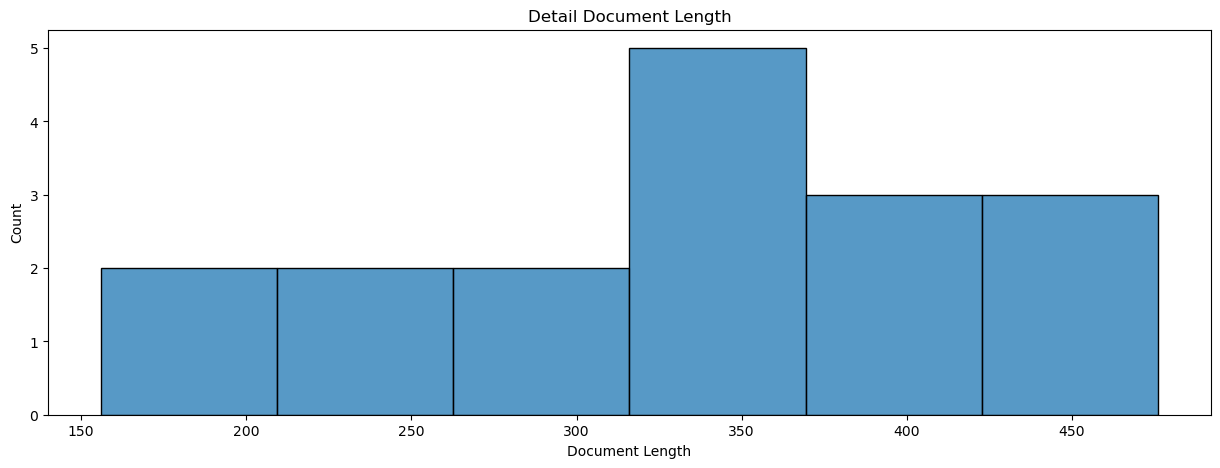

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data1['doc_len']).set(title='Detail Document Length', xlabel='Document Length', ylabel='Count')
print(round(np.mean(data1['doc_len'])),round(np.std(data1['doc_len'])))

In [26]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [27]:
def bag_of_words(X):
    bag=""
    for i in X:
        bag = bag + " " + i
    return bag

In [28]:
bag=bag_of_words(data1["clean"])
len(bag)

41284

Number of Unique Words
1444


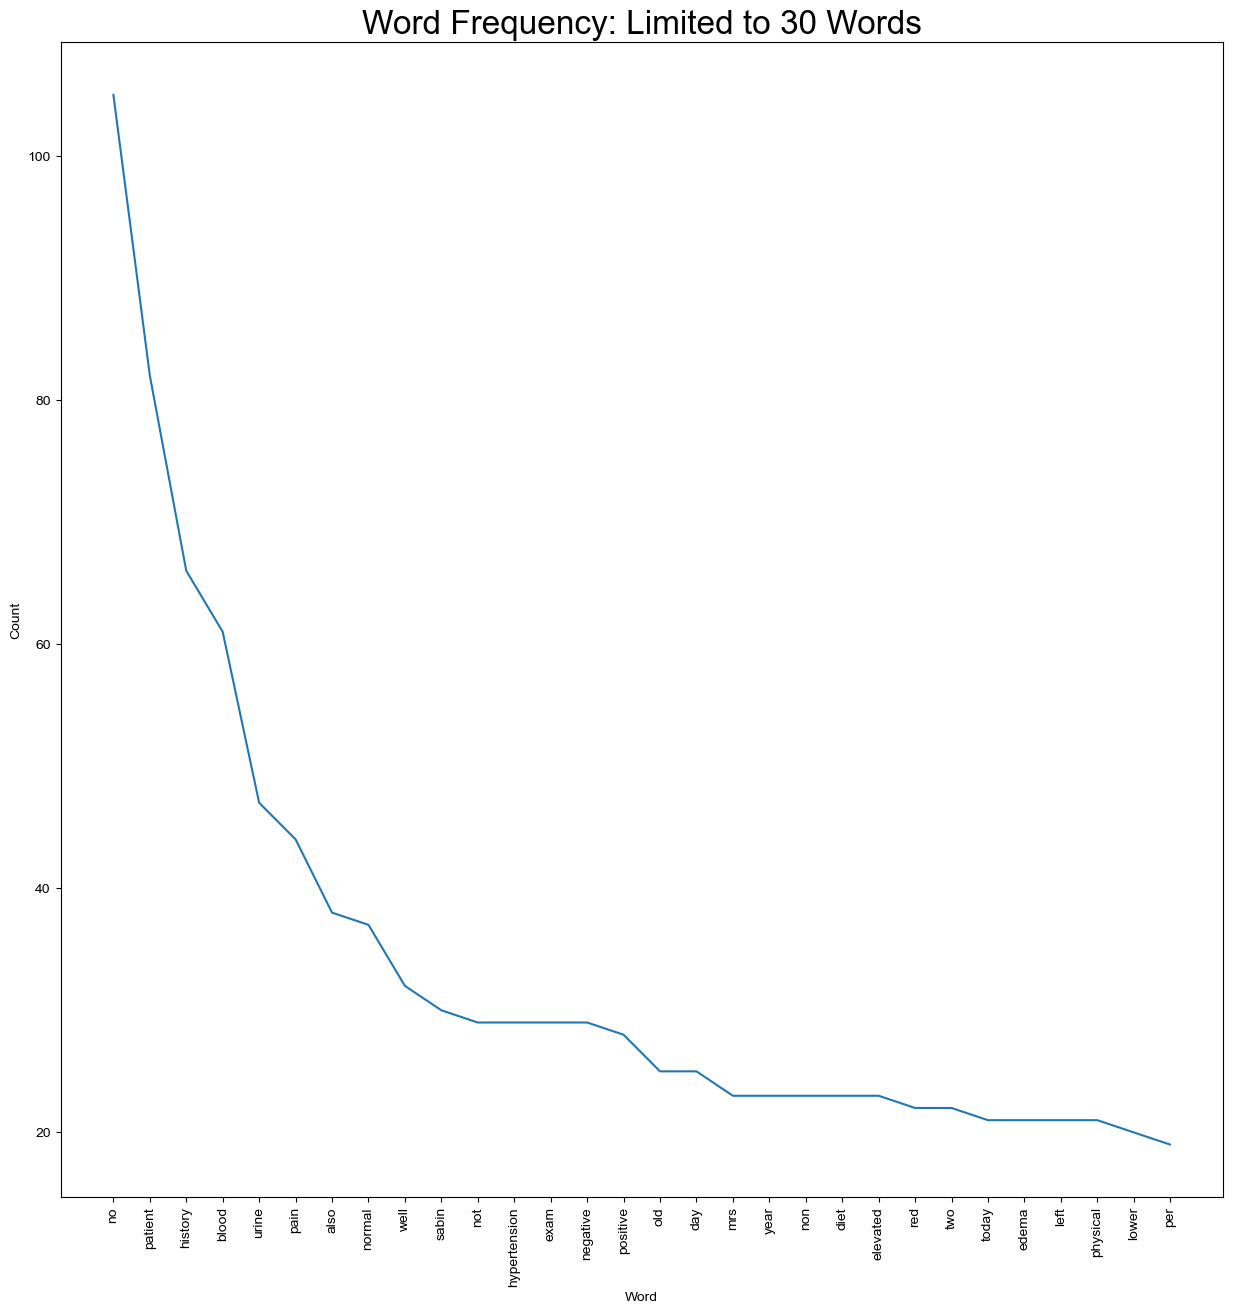

In [29]:
import itertools
from operator import itemgetter, attrgetter
from sklearn.feature_extraction import DictVectorizer
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size':20})
sns.set_style('darkgrid')
nlp_words=sorted(word_count(bag).items(),key=itemgetter(1),reverse=True)
print("Number of Unique Words")
print(len(nlp_words))
x,y = zip(*nlp_words)
plt.plot(x[0:30],y[0:30])
plt.title('Word Frequency: Limited to 30 Words'), 
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [30]:
def get_topics(components,vocab):
    topic_word_list = []
    sorted_terms=[]
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        st = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        sorted_terms.append(st)
    topic=" "
    for t in sorted_terms:
        topic=''
        for k in t:
            topic= topic + ' ' + k[0]
        topic_word_list.append(topic)
    return topic_word_list

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidvec = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = 'english')
TFIDF = tfidvec.fit_transform(data1['clean'])
TFIDF

<17x717 sparse matrix of type '<class 'numpy.float64'>'
	with 3072 stored elements in Compressed Sparse Row format>

In [32]:
tfidf_tokens = tfidvec.get_feature_names_out()
tfidf_tokens

array(['10', '100', '1015', '105', '13', '135', '139', '15', '160', '18',
       '185', '20', '25', '30', '31', '50', '500', '60', '64', '65', '66',
       '67', '75', '82', '83', '85', '86', '90', '92', '95', '986',
       'abdomen', 'abdominal', 'accident', 'acetaminophen', 'aches',
       'acid', 'acidic', 'active', 'activity', 'acute', 'addition',
       'additional', 'additionally', 'admit', 'admits', 'admitted',
       'admitting', 'afternoon', 'age', 'agent', 'ago', 'agreement',
       'ahead', 'alcohol', 'alcoholic', 'alert', 'alex', 'alive',
       'allergic', 'allergies', 'allergy', 'alleviate', 'allowed', 'alt',
       'ambulatory', 'amoxicillin', 'amp', 'angle', 'anterior',
       'apixaban', 'appears', 'appendectomy', 'approximately', 'artery',
       'aso', 'assessment', 'ast', 'atrial', 'auscultation', 'awake',
       'away', 'axis', 'bag', 'balanced', 'basic', 'beats', 'began',
       'believe', 'beverages', 'bicarb', 'bicarbonate', 'bilateral',
       'bilaterally', 'b

In [37]:
tfidf_dict = dict(zip(tfidf_tokens, TFIDF.toarray().sum(axis=0)))
# sort in descending order
tfidf_dict = dict(sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True))

# initialise dataframe
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index', columns=['tfidf'])
# name the index
tfidf_df.index = tfidf_df.index.rename('token')
# display first 5 rows
tfidf_df

,tfidf
token,
patient,2.146043
pain,1.342367
urine,1.192135
mrs,1.025628
sabin,0.973977
...,...
eating,0.106211
guarding,0.106211
proteinuria,0.106211


TFIDF Words


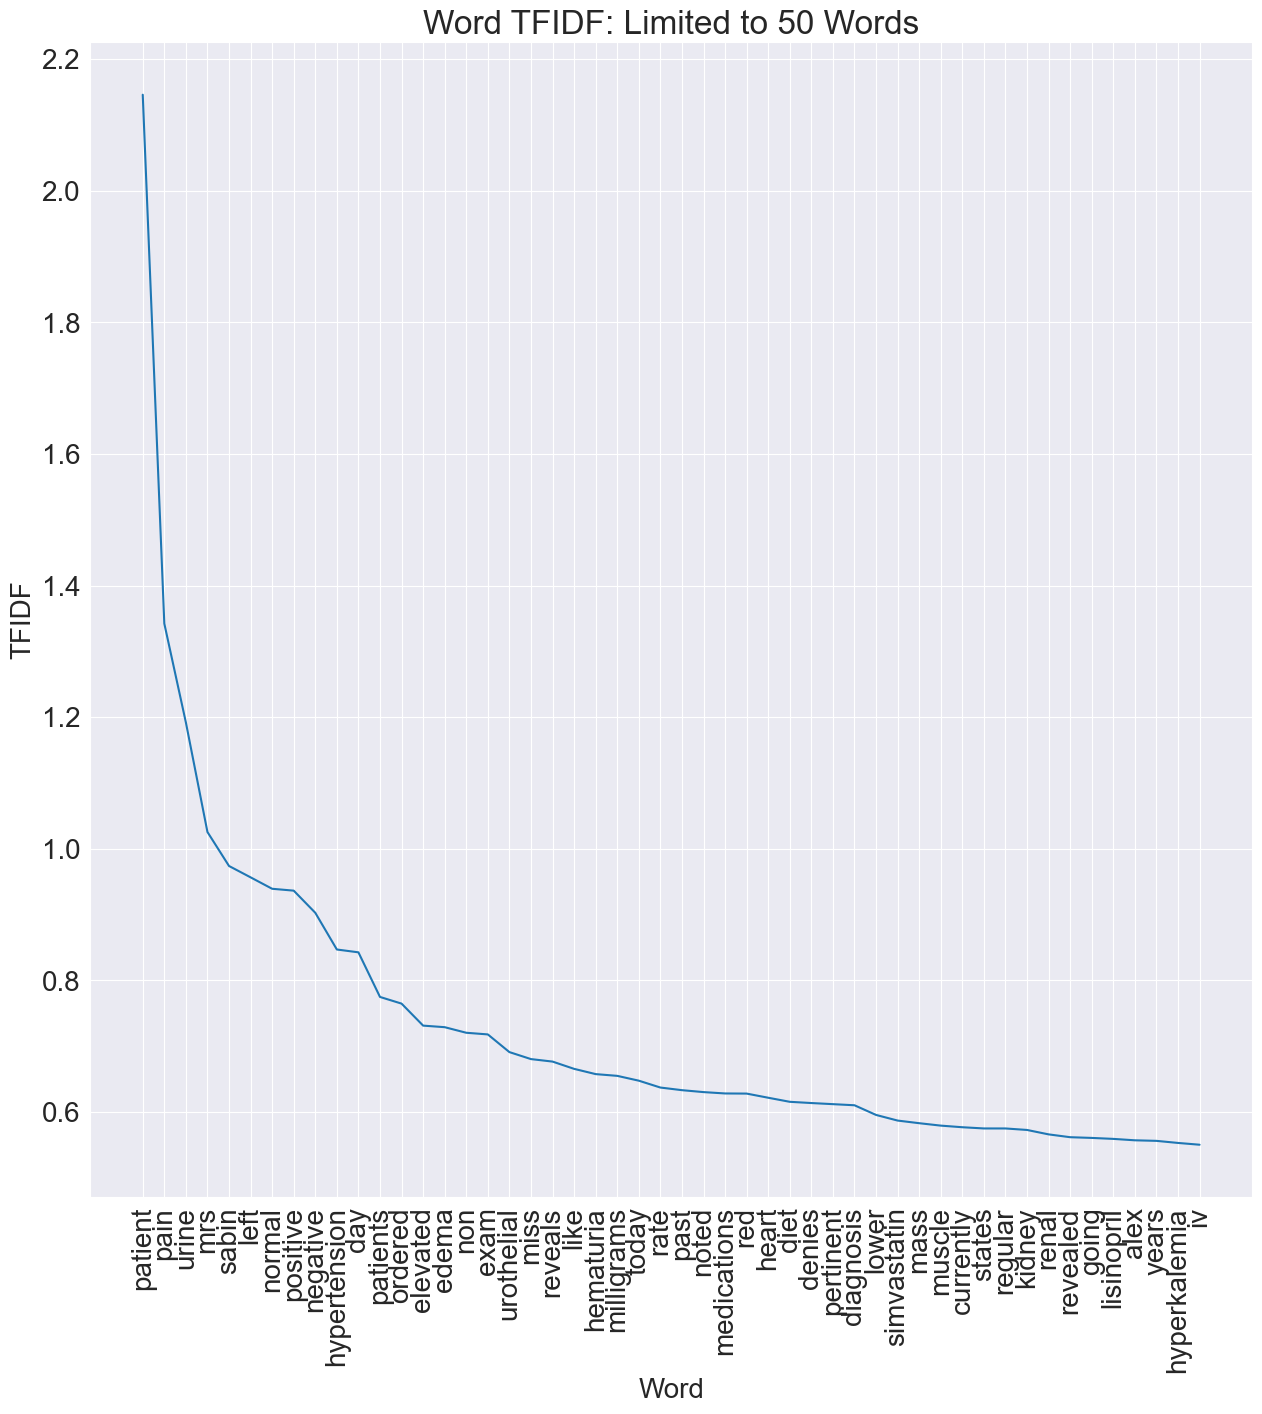

In [39]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.size':20})
sns.set_style('darkgrid')
#nlp_words=sorted(word_count(bag).items(),key=itemgetter(1),reverse=True)
print("TFIDF Words")
#print(len(nlp_words))
#x,y = zip(*nlp_words)
x = tfidf_df.index
y = tfidf_df['tfidf']
plt.plot(x[0:50],y[0:50])
plt.title('Word TFIDF: Limited to 50 Words'), 
plt.xlabel('Word')
plt.ylabel('TFIDF')
plt.xticks(rotation=90)
plt.show()